## Eye Gender prediction
### Wicliff Tah Angwah

# Introduction

The anthropometric analysis of the human face is an essential study for performing craniofacial plastic and reconstructive surgeries. Facial anthropometrics are affected by various factors such as age, gender, ethnicity, socioeconomic status, environment, and region.  

 

Plastic surgeons who undertake the repair and reconstruction of facial deformities find the anatomical dimensions of the facial structures useful for their surgeries. These dimensions are a result of the Physical or Facial appearance of an individual. Along with factors like culture, personality, ethnic background, age; eye appearance and symmetry contributes majorly to the facial appearance or aesthetics. 

 

Our objective is to build a model to scan the image of an eye of a patient and find if the gender of the patient is male or female.

 The dataset contains eye pictures of males and females. The dataset can be downloaded from the below link.

 

Dataset Link: https://drive.google.com/file/d/1f7uslI-ZHidriQFZR966_aILjlkgDN76/view?usp=sharing

From the above link, you will be able to download a zip file named ‘eye_gender_data.zip’. After you extract this zip file, you will get four files:

1) train - contains all the images that are to be used for training your model.<br>
2) Training_set.csv - this csv file has contains the labels for the training images<br>
3) test - contains 9000+ images. For these images you are required to make predictions<br>
4) Testing_set.csv - this is the order of the predictions for each image


## Table of Contents
1.1. Load libraries<br>
1.2. Loading and preparing training dataset<br>
1.3. Data preprocessing<br>
1.4. Model Building and hyperparameter tuning<br>
1.5. Validate the model<br>
1.6. Load test data<br>
1.7. Make predictions on test data<br>
1.8. Save the model<br>

## 1.1) Load Libraries

In [1]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score

## 1.2) Loading and preparing training dataset

In [4]:
labels = pd.read_csv("Training_set.csv") # loading the labels
file_paths = [[fname, 'train/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')

data = [] # initialize an empty numpy array
image_size = 100 # image size taken is 100 here. one can take other size too
for i in range(len(train_data)):

    img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_GRAYSCALE) # converting the image to gray scale

    new_img_array = cv2.resize(img_array, (image_size, image_size)) # resizing the image array
    data.append([new_img_array, train_data['label'][i]])

## 1.3) Data Preprocessing

In [49]:
train_images = []
train_labels = []
for i in range(len(data)):
    pixels = data[i][0]
    train_images.append(pixels)
    train_labels.append(data[i][1])

In [50]:
train_images = np.array(train_images).reshape(np.array(train_images).shape[0], 100, 100, 1)

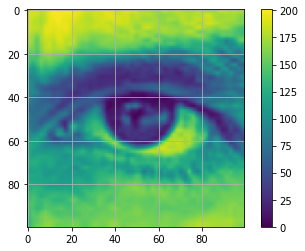

In [63]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid()
plt.show()

In [51]:
train_labels_new = []
for i in train_labels:
    if i == "male":
        train_labels_new.append(0)
    else:
        train_labels_new.append(1)

In [52]:
class_names = ['male', 'female']

In [55]:
train_labels_new = np.array(train_labels_new)

## 1.4) Model Building and Hyperparameter tuning

In [56]:
# Tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AvgPool2D, GlobalAveragePooling2D, BatchNormalization, Input
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
%load_ext tensorboard

from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [57]:

 # define input shape
INPUT_SHAPE = (100, 100, 1)

# define sequential model
model = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 256)               4

## 1.5) Validate the model

In [58]:
EPOCHS = 100
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2,
restore_best_weights=True,
verbose=1)

history = model.fit(train_images, train_labels_new,
batch_size=32,
callbacks=[es_callback],
validation_split=0.1, epochs=EPOCHS,
verbose=1)

Epoch 1/100
260/260 [==============================] - 65s 242ms/step - loss: 2.7457 - accuracy: 0.6868 - val_loss: 0.4922 - val_accuracy: 0.7592
Epoch 2/100
260/260 [==============================] - 63s 241ms/step - loss: 0.5125 - accuracy: 0.7562 - val_loss: 0.4846 - val_accuracy: 0.7701
Epoch 3/100
260/260 [==============================] - 62s 239ms/step - loss: 0.4329 - accuracy: 0.8057 - val_loss: 0.4102 - val_accuracy: 0.8113
Epoch 4/100
260/260 [==============================] - 63s 242ms/step - loss: 0.4443 - accuracy: 0.8078 - val_loss: 0.5618 - val_accuracy: 0.7213
Epoch 5/100
260/260 [==============================] - 66s 255ms/step - loss: 0.3905 - accuracy: 0.8288 - val_loss: 0.4135 - val_accuracy: 0.8091
Epoch 5: early stopping


# Predicting The Output For Testing Data

## 1.6) Loading Test Data

In [60]:
path = "test"
filess = os.listdir(path)
test_images = []
for file in filess:
    imgpath = os.path.join(path, file)
    img = cv2.imread(imgpath, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (100, 100))
    test_images.append(img)
len(test_images)

2305

In [61]:
test_images[0]

array([[140, 141, 142, ..., 169, 171, 173],
       [138, 138, 138, ..., 166, 168, 170],
       [137, 135, 134, ..., 163, 164, 166],
       ...,
       [146, 150, 155, ..., 151, 151, 151],
       [146, 151, 157, ..., 148, 147, 146],
       [147, 152, 158, ..., 147, 145, 143]], dtype=uint8)

In [62]:
test_images = np.array(test_images).reshape(np.array(test_images).shape[0], 100, 100, 1)

## 1.7) Make predictions on test data

In [64]:
predictions = model.predict(test_images)

73/73 [==============================] - 5s 67ms/step


In [67]:
class_names[np.argmax(predictions[1])]

'female'

In [69]:
pred_labels = []
for i in range(len(predictions)):
    lab = class_names[np.argmax(predictions[i])]
    pred_labels.append(lab)

In [73]:
res = pd.DataFrame(pred_labels, columns=['label'])
res_csv = res.to_csv('Result.csv')

In [78]:
df = pd.read_csv('Result.csv')

In [79]:
df = df[['label']]

In [80]:
df.head()

,label
0,male
1,female
2,male
3,male
4,male


In [81]:
df.to_csv('final_result.csv')

In [82]:
df.shape

(2305, 1)

In [83]:
train_labels

['male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'male',
 'female',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
